   # "Sentiment Analysis of Trendy Twitter Subjects in US"

Twitter is one of the best indicators of the wider pulse of the world and what’s happening within it among the social media tools. In this era, people are exposing their thoughts, perspectives and ideas about a specific topic or subject via Twitter  mostly.

Smart companies are learning what’s required to extract the insights that are flowing  through the Tweets, sent every moment and it has been used as an important tool to  detect relevant trends, emotions of the public about those trends.

The ability to categorize opinions in the text of tweets-and specially to determine  whether the user’s attitude is positive, negative, or neutral-is highly valuable.  People are just a click away from getting huge chunk of information. With information comes people’s opinion and with this comes the positive, negative or neutral outlook of people regarding a topic. 

So in this project I will use a data set containing a collection of tweets about given-subjects to detect the sentiment associated with and detect the output as negative, neutral or positive accordingly using Machine Learning. 

Sentiment Analysis involves Natural Language Processing because it deals with  human-written text and a classification task which will classify people’s opinion expressed about different subjects chosen to be evaluated. Sentiment Analysis can help us decipher the mood and emotions of general public and gather insightful information regarding the context. Sentiment Analysis is a process of analyzing data and classifying it based on the need of the research.

The tweets on a specific time period, on a specific location, and on a specific subject  either an individual or anything will be the focus of this project. These tweets will  be classified by sentiment analysis and output of this analysis will be evaluated. 



__Importing the Data__

In the project, I will use Twitter data by connecting the Twitter API. I will retrieve 5000 tweets about the subject I will focus with the extended mode. All the tweets will be in English as language. This project will use Streaming API that allows to collect tweets on a real-time basis based on search terms, user ids or locations.

Twitter API stands for Application Programming Interface that makes interaction with computer programs and web services easy. This project will download tweets related to 5 keywords: "Covid", "stimulus", "Trump", "Biden", "vaccine". I intentionaly select these subjects because, these topics are the most popular keywords for last months and still they have more attractions than other issues in the thoughts of public.

In order to access Twitter Streaming API, we need to get 4 pieces of information from Twitter: API key, API secret, Access token and Access token secret.

I will be using a Python library called "Tweepy" to connect to Twitter API and download the data.

In [295]:
import tweepy
import json
from tweepy import StreamListener
import tweepy as tw
import pandas as pd
consumer_key="5TxMWtOP65BODdT82xCv9uAiX"
consumer_secret="oO6z8z4T4JQSV8fM7YW1aGXg3jAScuIJHsPewVdboXJ35CnDUu"
access_token="1327052206659559430-YrCsGJeWFYn3C7owysQ1k423TG16V2"
access_token_secret="Z09W1GoZ1YJ7zqnusxNL4ZF4WzRVBcR2w9tHtPouEpqCa"
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)
results = []
for tweet in tweepy.Cursor (api.search, q = 'Trump -filter:retweets', lang = "en", tweet_mode='extended').items(5000): 
    results.append(tweet)
    
print (type(results))
print (len(results))

<class 'list'>
5000


# __Preprocessing__

The process of converting data to something a computer can understand is referred to as pre-processing. One of the major forms of pre-processing is to filter out useless data.

Here I parse the response from the twitter API into a structured table. The response from twitter streaming API’s is in the below format:

I run the codes and get the output. The data stored the relevant tweets in a dataframe which involves various variables, but in this project I will only extract the "full_text", "id" and "the date (created_at)" of the tweet. The data has extracted "full_text" because when using 'extended' mode, the text is replaced by "full_text" attribute. 

I found that some tweets have the exact same text but have been re-tweeted by different users. In order to extract a variety of hashtags from the tweets and to make the analysis unbiased, I decided to remove the duplicate tweets.

In [ ]:
def tweets_df(results):
    id_list = [tweet.id for tweet  in results]
    data_set = pd.DataFrame(id_list, columns = ["id"])
    
    data_set["full_text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    
    return data_set
data_set = tweets_df(results)

In [297]:
text = data_set["full_text"]
for i in range(0,len(text)):
    txt = ' '.join(word for word in text[i] .split() if not word.startswith('https:'))
    data_set.at[i, 'text2'] = txt
    
data_set.drop_duplicates('text2', inplace=True)
data_set.reset_index(drop = True, inplace=True)
data_set.drop('full_text', axis = 1, inplace = True)
data_set.rename(columns={'text2': 'full_text'}, inplace=True)

# __Data Wrangling__

This project will look at the full_text of the data which involves special characters and punctuations. In Sentiment analysis, understanding and being able to use regular expressions is a prerequisite for doing any task. You can remove URLs (links) using regular expressions accessed from the "re" package which stands for "regular expressions". 

Below codes will remove special characters other than alphanumerics and replace it with nothing. "re.sub" allows to substitute a selection of characters defined using a regular expression, with something else.

Capitalization is also a challenge when analyzing text data. If you are trying to create a list of unique words in your tweets, words with capitalization will be different from words that are all lowercase. To account for this, I made each word lowercase using the string method ".lower()"

In [298]:
import re
    #print(re.sub(r"[^a-zA-Z0-9]+", ' ', k))
f = lambda x: re.sub(r"[^a-zA-Z.,!?/:;\"\'\s]+", ' ', x)
data_set['full_text'] = data_set['full_text'].apply(f)

In [299]:
f = lambda x: x.lower()
data_set['full_text'] = data_set['full_text'].apply(f)

# Modeling (Sentiment Analysis)


People express their opinions via tweets and these usually have sentiment associated with it i.e. positive, negative or neutral. Analysis of this sentiment may lead to some useful insight on the topic being discussed.

Python has an inbuilt library (TextBlob) to do this. TextBlob is a python library for Natural Language Processing (NLP). TextBlob is a simple library which supports complex analysis and operations on textual data.

Sentiment of the each tweet will consist of 3 (three) range:

if sentiment < 0.00, this will correspond to negative

if sentiment = 0.00, this will correspond to neutral

if sentiment > 0.00, this will correspond to positive.



In [300]:
from textblob import TextBlob
text = data_set["full_text"]

for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    data_set.at[i, 'Sentiment'] = sentiment
    if sentiment <0.00:
        SentimentClass = 'Negative'
        data_set.at[i, 'SentimentClass'] = SentimentClass 
    elif sentiment >0.00:
        SentimentClass = 'Positive'
        data_set.at[i, 'SentimentClass'] = SentimentClass 
    else:
        SentimentClass = 'Neutral'
        data_set.at[i, 'SentimentClass'] = SentimentClass 

After making the sentiment analysis, I will save the output as a csv file. Until this step, I applied the same codes and NLP Sentiment Analysis model to each subject. I saved each output data as a seperate file to run them seperately.

I will start with the analysis of Tweets about Trump:

In [ ]:
tweet = data_set.to_csv("/Users/bahtinur/Desktop/Tweet/Trump.csv")

I will read the file and reveal the output.

In [302]:
tweet_Trump = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/Trump.csv"), index_col=0)

I am going to display the Sentiment value in % format to make it easily understandable.

In [303]:
tweet_Trump['Sentiment'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tweet_Trump['Sentiment']], index = tweet_Trump.index)

The first 5 rows of the dataset related to Trump tweets.

In [304]:
tweet_Trump.head()

,id,created_at,full_text,Sentiment,SentimentClass
0,1330756653721948162,2020-11-23 06:14:45,"excitedamerica msnbc you are correct, the st...",5.00%,Positive
1,1330756652631433218,2020-11-23 06:14:44,realdonaldtrump at a saturday session on inte...,-6.67%,Negative
2,1330756651910094849,2020-11-23 06:14:44,jeepmtn matthew trump there is integrity in ...,-5.00%,Negative
3,1330756650827911171,2020-11-23 06:14:44,"meidas kelly seems kinda cheap for trump, i d...",45.00%,Positive
4,1330756650584530944,2020-11-23 06:14:44,brianinmississ steb hoping trump his gang...,12.67%,Positive


The "id" column is not relevant on our analysis and will be dropped from the data. Also, I will rename "created_at" as "date" to make the dataset more clarified.

In [305]:
del tweet_Trump['id']

In [306]:
tweet_Trump.rename(columns={'created_at':'date'}, inplace=True)


Lets look at the first 5 rows of the dataset.

In [307]:
tweet_Trump.head()

,date,full_text,Sentiment,SentimentClass
0,2020-11-23 06:14:45,"excitedamerica msnbc you are correct, the st...",5.00%,Positive
1,2020-11-23 06:14:44,realdonaldtrump at a saturday session on inte...,-6.67%,Negative
2,2020-11-23 06:14:44,jeepmtn matthew trump there is integrity in ...,-5.00%,Negative
3,2020-11-23 06:14:44,"meidas kelly seems kinda cheap for trump, i d...",45.00%,Positive
4,2020-11-23 06:14:44,brianinmississ steb hoping trump his gang...,12.67%,Positive


In [308]:
tweet_Trump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4893 entries, 0 to 4892
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            4893 non-null   object
 1   full_text       4893 non-null   object
 2   Sentiment       4893 non-null   object
 3   SentimentClass  4893 non-null   object
dtypes: object(4)
memory usage: 191.1+ KB


In the dataset of the tweets those have subject of "Trump", has 4893 non-null entries and all of them are object type.

In [309]:
tweet_Trump['SentimentClass'].value_counts()

Positive    2095
Neutral     1465
Negative    1333
Name: SentimentClass, dtype: int64

When we reveal the counts of the each sentiment class, the positive tweets about Trump are the highest when we compare with other two classes. 

In [310]:
tweet_Trump['SentimentClass'].value_counts()/len(tweet_Covid) * 100

Positive    42.737658
Neutral     29.885761
Negative    27.192982
Name: SentimentClass, dtype: float64

The count of the each sentiment class, the dataset reveals that almost %43 of the tweets used "Trump" as subject are positive that reveals that users of these tweets have positive perspective on President Trump. %42 of these tweets were positive, %29 are neutral and %27 of the tweets have negative perspective.

We can also look at the highest and lowest size tweets about Trump.

In [ ]:
length_text = tweet_Trump['full_text'].str.len()

In [312]:
max(length_text)

756

In [313]:
min(length_text)

5

Here is the visualization of the tweet about Trump which reveals that the count of negative and neutral tweets are almost same and positive ones have the highest number of counts.

<AxesSubplot:>

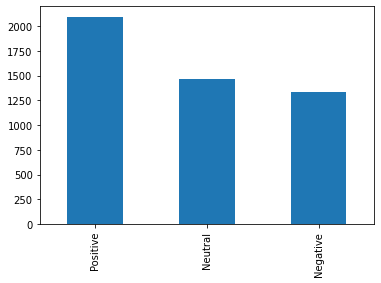

In [314]:
import matplotlib.pyplot as plt
tweet_Trump['SentimentClass'].value_counts().plot(kind='bar', width=0.5)

It is time to look at the 2nd subject of this project which will be the rival of the President Trump during the election: "Biden". 

As I mentioned above, I retrieved the tweets about Biden with using Twitter API and save it as a csv file.

In [55]:
tweet_Biden = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/Biden.csv"), index_col=0)

In [56]:
tweet_Biden['Sentiment'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tweet_Biden['Sentiment']], index = tweet_Biden.index)

In [57]:
tweet_Biden.head()

,id,created_at,full_text,Sentiment,SentimentClass
0,1330752855066763264,2020-11-23 05:59:39,"whitehouse how about u post a plan cv , don...",25.00%,Positive
1,1330752854072692736,2020-11-23 05:59:39,biden and harris will have a hard time getting...,25.42%,Positive
2,1330752853913128960,2020-11-23 05:59:39,joenbc jonlemire with not a shred of evidenc...,0.00%,Neutral
3,1330752851543470081,2020-11-23 05:59:38,blinken was a key adviser to biden when the s...,0.00%,Neutral
4,1330752850889203719,2020-11-23 05:59:38,snl got jim carrey to okay biden because he is...,-15.00%,Negative


I followed the same process as I did in the previous subject during the data wrangling process.

In [58]:
del tweet_Biden['id']

In [59]:
tweet_Biden.rename(columns={'created_at':'date'}, inplace=True)


In [60]:
tweet_Biden.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4862 entries, 0 to 4861
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            4862 non-null   object
 1   full_text       4861 non-null   object
 2   Sentiment       4862 non-null   object
 3   SentimentClass  4862 non-null   object
dtypes: object(4)
memory usage: 189.9+ KB


When I checked the counts of the each column, I realized that the column "full_text" has an NaN value and it has to be dropped.

In [67]:
tweet_Biden[tweet_Biden.isna().any(axis=1)]
tweet_Biden = tweet_Biden.dropna(how='any')

In [68]:
tweet_Biden.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4861 entries, 0 to 4861
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            4861 non-null   object
 1   full_text       4861 non-null   object
 2   Sentiment       4861 non-null   object
 3   SentimentClass  4861 non-null   object
dtypes: object(4)
memory usage: 189.9+ KB


In [69]:
tweet_Biden['SentimentClass'].value_counts()

Neutral     2051
Positive    1881
Negative     929
Name: SentimentClass, dtype: int64

In [70]:
tweet_Biden['SentimentClass'].value_counts()/len(tweet_Biden) * 100

Neutral     42.192964
Positive    38.695742
Negative    19.111294
Name: SentimentClass, dtype: float64

The count of the each sentiment class, the dataset reveals that almost %42 of the tweets used "Biden" as subject are neutral that reveals that users of these tweets have neutral perspective on President-elect Biden. %39 of these tweets were positive, %19 of the tweets have negative perspective. We can understand that, most of the tweets about Biden have neutral and positive emotion.

In [346]:
length_text = tweet_Biden['full_text'].str.len()

In [347]:
max(length_text)

140.0

In [348]:
min(length_text)

7.0

<AxesSubplot:>

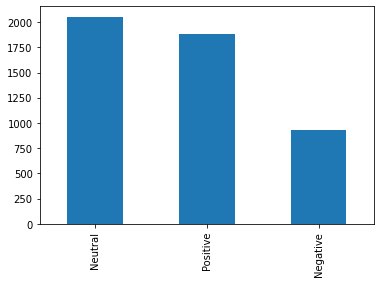

In [349]:
import matplotlib.pyplot as plt
tweet_Biden['SentimentClass'].value_counts().plot(kind='bar', width=0.5)

In [14]:
tweet_Covid = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/Covid.csv"), index_col=0)

In [15]:
tweet_Covid['Sentiment'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tweet_Covid['Sentiment']], index = tweet_Covid.index)

In [16]:
tweet_Covid.head()

,id,created_at,full_text,Sentiment,SentimentClass
0,1330567120091025412,2020-11-22 17:41:36,hairymarx keithwmacdonal maajidnawaz lbc...,-60.00%,Negative
1,1330567119264681985,2020-11-22 17:41:36,anti vaxxers think that if they don t get the ...,45.62%,Positive
2,1330567118765506560,2020-11-22 17:41:36,joncoopertweets i ve said all along if it s d...,0.00%,Neutral
3,1330567113078169606,2020-11-22 17:41:35,lkgwin mmpadellan will that trigger drumoft?...,50.00%,Positive
4,1330567108707676162,2020-11-22 17:41:34,government exploring modalities of emergency a...,0.00%,Neutral


In [17]:
del tweet_Covid['id']
tweet_Covid.rename(columns={'created_at':'date'}, inplace=True)

In [18]:
tweet_Covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4813 entries, 0 to 4812
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            4813 non-null   object
 1   full_text       4813 non-null   object
 2   Sentiment       4813 non-null   object
 3   SentimentClass  4813 non-null   object
dtypes: object(4)
memory usage: 188.0+ KB


In [19]:
tweet_Covid['SentimentClass'].value_counts()

Positive    2403
Neutral     1350
Negative    1060
Name: SentimentClass, dtype: int64

In [20]:
tweet_Covid['SentimentClass'].value_counts()/len(tweet_Covid) * 100

Positive    49.927280
Neutral     28.049034
Negative    22.023686
Name: SentimentClass, dtype: float64

When I look at the count of the each sentiment class, the dataset reveals that half of the tweets used "Covid" as subject are positive that reveals that users of these tweets have positive perspective on Covid pandamic. %50 of these tweets were positive, %28 are neutral and %22 of the tweets have negative emotion.

In [21]:
tweet_Covid['SentimentClass'].value_counts()/len(tweet_Covid) * 100

Positive    49.927280
Neutral     28.049034
Negative    22.023686
Name: SentimentClass, dtype: float64

In [22]:
length_text = tweet_Covid['full_text'].str.len()

In [23]:
max(length_text)

908

In [24]:
min(length_text)

4

<AxesSubplot:>

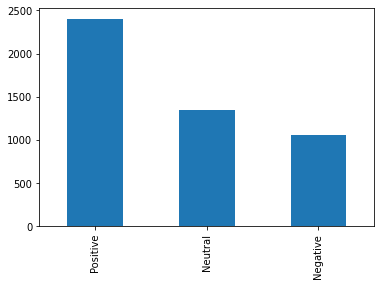

In [25]:
import matplotlib.pyplot as plt
tweet_Covid['SentimentClass'].value_counts().plot(kind='bar', width=0.5)

In [26]:
import tweepy
import json
from tweepy import StreamListener
import tweepy as tw
import pandas as pd

In [27]:
tweet_stimulus = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/stimulus.csv"), index_col=0)

In [28]:
tweet_stimulus['Sentiment'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tweet_stimulus['Sentiment']], index = tweet_stimulus.index)

In [29]:
tweet_stimulus.head()

,id,created_at,full_text,Sentiment,SentimentClass
0,1330775252339572737,2020-11-23 07:28:39,pandemic stimulus: cancel student loans by exe...,0.00%,Neutral
1,1330775251664429061,2020-11-23 07:28:39,repmichaelwaltz senrickscott spaceforcedod ...,0.00%,Neutral
2,1330775152179752964,2020-11-23 07:28:15,senrickscott america stimulus now . mil...,6.82%,Positive
3,1330775041685020672,2020-11-23 07:27:49,markets move higher as investors eye the ele...,25.00%,Positive
4,1330775013746733057,2020-11-23 07:27:42,"aerosol may not be good for the environment, b...",60.00%,Positive


In [30]:
del tweet_stimulus['id']
tweet_stimulus.rename(columns={'created_at':'date'}, inplace=True)

In [31]:
tweet_stimulus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4690 entries, 0 to 4689
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            4690 non-null   object
 1   full_text       4690 non-null   object
 2   Sentiment       4690 non-null   object
 3   SentimentClass  4690 non-null   object
dtypes: object(4)
memory usage: 183.2+ KB


In [32]:
tweet_stimulus['SentimentClass'].value_counts()

Neutral     2103
Positive    1723
Negative     864
Name: SentimentClass, dtype: int64

The count of the each sentiment class, the dataset reveals that almost %45 of the tweets used "stimulus" as subject are neutral that reveals that users of these tweets have neutral perspective on stimulus relief package. %38 of these tweets were positive, %18 of the tweets have negative perspective. We can understand that, most of the tweets about stimulus have neutral and positive emotion.

In [33]:
tweet_stimulus['SentimentClass'].value_counts()/len(tweet_stimulus) * 100

Neutral     44.840085
Positive    36.737740
Negative    18.422175
Name: SentimentClass, dtype: float64

In [37]:
length_text = tweet_stimulus['full_text'].str.len()

In [38]:
max(length_text)

143

In [39]:
min(length_text)

12

<AxesSubplot:>

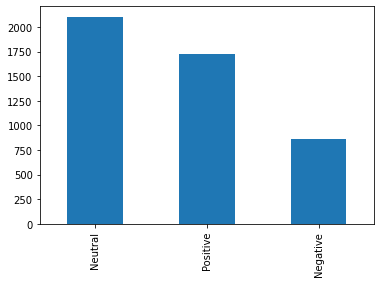

In [40]:
import matplotlib.pyplot as plt
tweet_stimulus['SentimentClass'].value_counts().plot(kind='bar', width=0.5)

In [41]:
tweet_vaccine = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/vaccine.csv"), index_col=0)

In [42]:
tweet_vaccine['Sentiment'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tweet_vaccine['Sentiment']], index = tweet_vaccine.index)

In [43]:
tweet_vaccine.head()

,id,created_at,full_text,Sentiment,SentimentClass
0,1330833397120454656,2020-11-23 11:19:42,oxford uni newsletter confirms the key princip...,-20.00%,Negative
1,1330833393026621441,2020-11-23 11:19:41,kaarnama vinayak jain bcoz vaccine isafe by...,0.00%,Neutral
2,1330833388987699201,2020-11-23 11:19:40,kieranmurphy lilyallen yes it is. this is t...,13.64%,Positive
3,1330833387469332485,2020-11-23 11:19:39,lynnehall uniofoxford is enough to protect...,10.00%,Positive
4,1330833386185908225,2020-11-23 11:19:39,"cjhancock ah, vaccine peak. one standout sess...",0.00%,Neutral


In [44]:
tweet_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4670 entries, 0 to 4669
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              4670 non-null   int64 
 1   created_at      4670 non-null   object
 2   full_text       4670 non-null   object
 3   Sentiment       4670 non-null   object
 4   SentimentClass  4670 non-null   object
dtypes: int64(1), object(4)
memory usage: 218.9+ KB


In [45]:
tweet_vaccine['SentimentClass'].value_counts()

Positive    2139
Neutral     1867
Negative     664
Name: SentimentClass, dtype: int64

The count of the each sentiment class, the dataset reveals that almost %46 of the tweets used "vaccine" as subject are positive that reveals that users of these tweets have positive perspective on vaccine about Covid-19. %40 of these tweets were neutral, %15 of the tweets have negative perspective. We can understand that, most of the tweets about vaccine have neutral and positive emotion.

In [46]:
tweet_vaccine['SentimentClass'].value_counts()/len(tweet_vaccine) * 100

Positive    45.802998
Neutral     39.978587
Negative    14.218415
Name: SentimentClass, dtype: float64

In [47]:
length_text = tweet_vaccine['full_text'].str.len()

In [48]:
max(length_text)

140

In [49]:
min(length_text)

7

<AxesSubplot:>

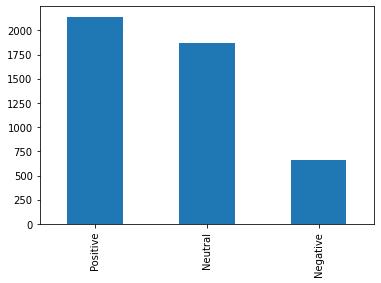

In [50]:
import matplotlib.pyplot as plt
tweet_vaccine['SentimentClass'].value_counts().plot(kind='bar', width=0.5)